## Setup Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings("ignore")
 

In [2]:
df=pd.read_csv('train.csv')
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [3]:
df.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,115.614301,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,99.750000,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,199.500000,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,299.250000,3.543428,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,399.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##Exploratory Data Analysis
1. Distribution of Data
2. Relationship between features
3. Detecting Outliers





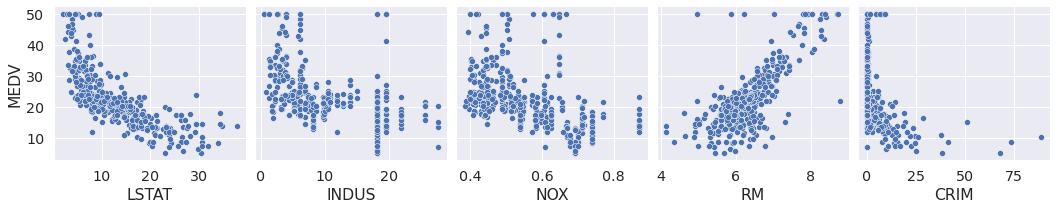

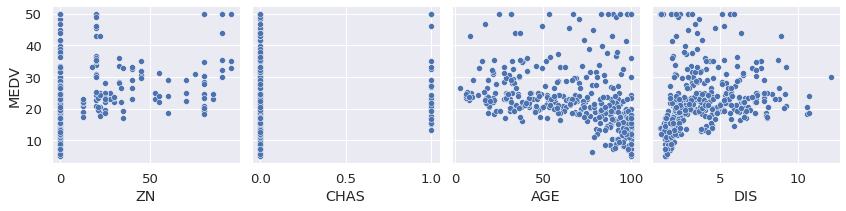

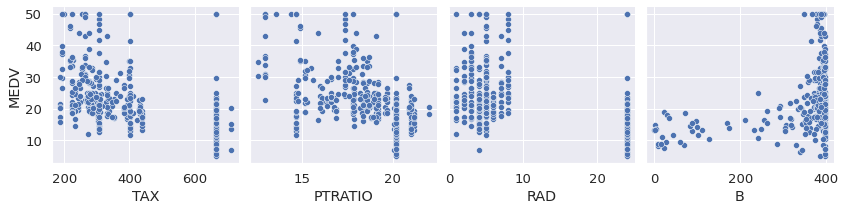

In [4]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'CRIM']
cols1=['ZN','CHAS',	'AGE',	'DIS',	]
cols2=['TAX',	'PTRATIO','RAD','B'	]
y=['MEDV']


sns.set_context("notebook", font_scale=1.3)
sns.pairplot(data=df,x_vars=cols,y_vars=y,height=3,aspect=1,)
plt.show()

sns.set_context("notebook", font_scale=1.2)
sns.pairplot(data=df,x_vars=cols1,y_vars=y,height=3,aspect=1,)
plt.show()

sns.set_context("notebook", font_scale=1.2)
sns.pairplot(data=df,x_vars=cols2,y_vars=y,height=3,aspect=1,)
plt.show()


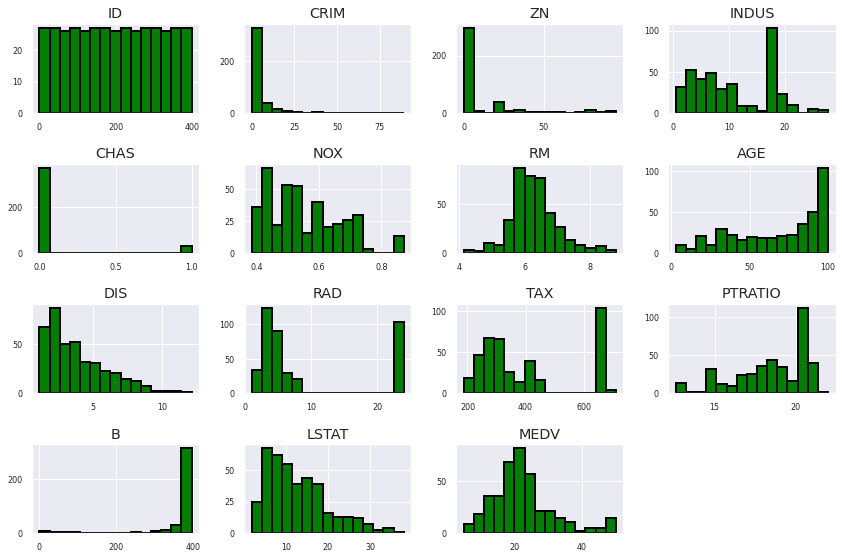

In [5]:
df.hist(bins=15, color='green', edgecolor='black', linewidth=2,xlabelsize=8, ylabelsize=8, grid=True)
plt.tight_layout(rect=(0, 0, 2, 2))


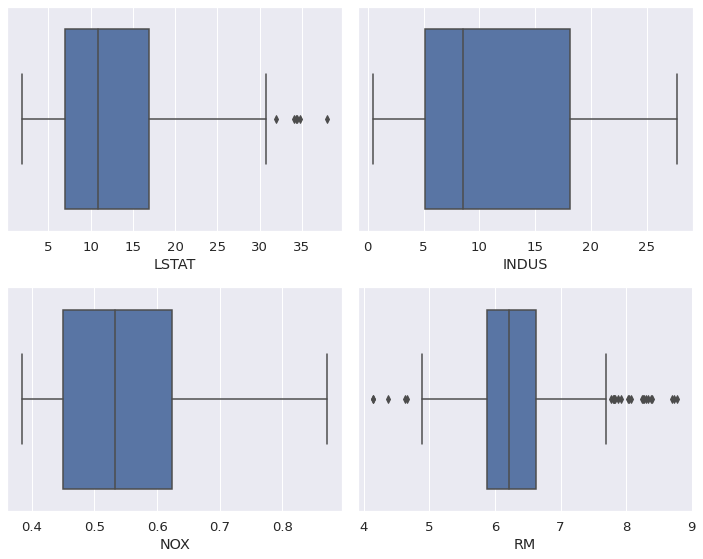

In [6]:

# Creating subplot axes
fig, axes = plt.subplots(2,2,figsize=(10,8))

# Iterating through axes and names
for i, ax in zip(cols, axes.flatten()):
  g=sns.boxplot(x=df[i],ax=ax,)
plt.tight_layout()
 
    


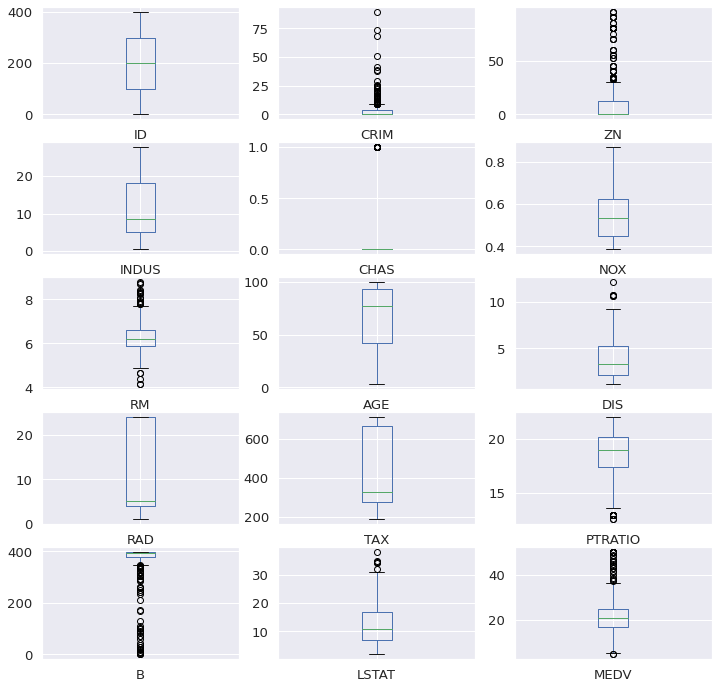

In [7]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

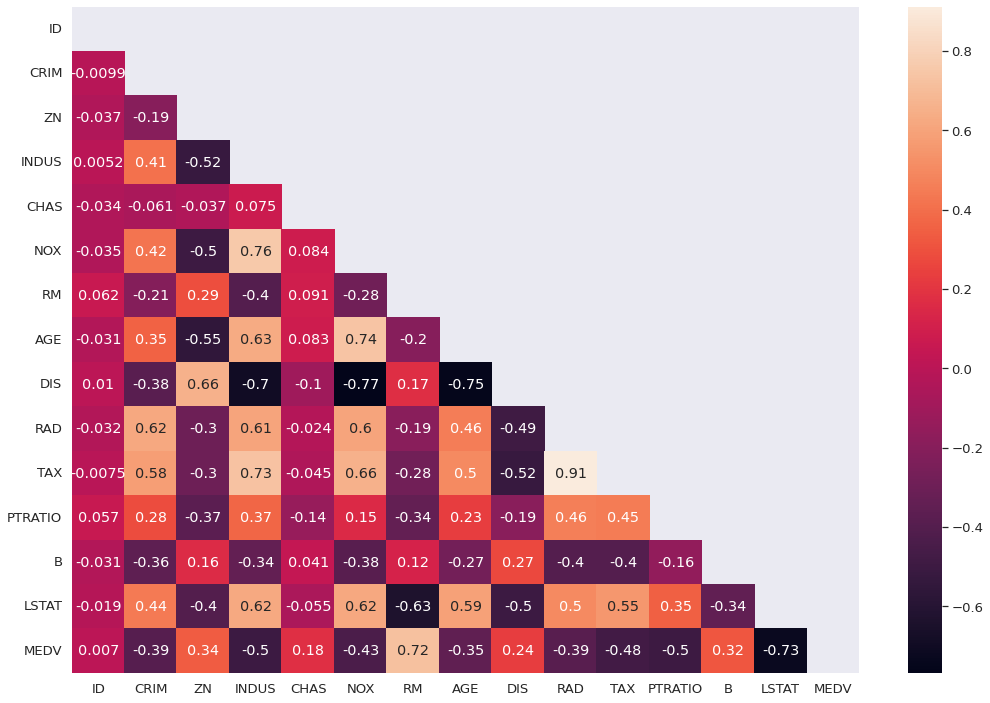

In [8]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,mask=mask)
plt.tight_layout()

Standardization of train and test data


1. Id feature variable is dropped
2. train-test split data





In [9]:
df.drop('ID',axis=1,inplace=True)



In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


target=df['MEDV'].values
train=df.iloc[:,0:-1].values
train=StandardScaler().fit_transform(train)
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size = 0.2)




Evaluating training fit:
 Model is trained on Train data and observed how well model is fitted with Train data using $R^{2}$ metrics 

1.   $R^2$: 0.75
2.   $Mean Sqaure Error$: 21.4



In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regression = LinearRegression()
# Fit the linear regression
model = regression.fit(X_train, Y_train)
print("R^2=",model.score(X_train, Y_train))
predicted_train= model.predict(X_train)
print("Coefficient of determination R^2: %.2f" %r2_score(Y_train,predicted_train))
print("Mean squared error: %.2f" % mean_squared_error(Y_train,predicted_train))

R^2= 0.773843099317328
Coefficient of determination R^2: 0.77
Mean squared error: 20.61


Evaluation on Test data:
 Trained Model is evaluated on Test data using $R^{2}$ metrics 
1.   $R^2$: 0.55
2.   $Mean Sqaure Error$: 31.1

In [12]:
predicted_test= model.predict(X_test)
print("Coefficient of determination R^2: %.2f" %r2_score(Y_test,predicted_test))
print("Mean squared error: %.2f" % mean_squared_error(Y_test,predicted_test))

Coefficient of determination R^2: 0.55
Mean squared error: 26.43


Plotting how well test data is fitted:


1.   More close data to red line (ideal line), more $R^2$ value.
2.   However few points are not captured by model, this could be due to the outliers. 



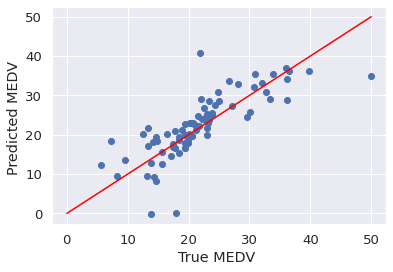

In [13]:
x=np.linspace(0,Y_test.max(),100)
plt.scatter(Y_test,predicted_test)
plt.plot(x,x,color='red')
plt.xlabel('True MEDV ')
plt.ylabel('Predicted MEDV ')
plt.show()

Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=8)
tree.fit(X_train,Y_train)
predicted_test= tree.predict(X_test)
print("Coefficient of determination R^2: %.2f" %r2_score(Y_test,predicted_test))
print("Mean squared error: %.2f" % mean_squared_error(Y_test,predicted_test))

Coefficient of determination R^2: 0.80
Mean squared error: 11.46


Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train, Y_train)
predicted_test= forest.predict(X_test)
print("Coefficient of determination R^2: %.2f" %r2_score(Y_test,predicted_test))
print("Mean squared error: %.2f" % mean_squared_error(Y_test,predicted_test))

Coefficient of determination R^2: 0.79
Mean squared error: 12.58


XGBoost Regressor

In [36]:
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, Y_train)
predicted_test= model.predict(X_test)
print("Coefficient of determination R^2: %.2f" %r2_score(Y_test,predicted_test))
print("Mean squared error: %.2f" % mean_squared_error(Y_test,predicted_test))


[06:41:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Coefficient of determination R^2: 0.78
Mean squared error: 12.98
